In [1]:
import pandas as pd
import numpy as np
from math import pi,e,cos
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import f1_score
from sklearn.manifold import TSNE
from matplotlib import cm
import itertools

## Preparing data

In [2]:
data = pd.read_csv('wine.csv')
data.dropna(inplace = True)

In [3]:
display(data[:5])

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
cols = list(data)
cols.remove('class')
cols.append('class')

In [5]:
data = data.loc[:, cols]

In [6]:
display(data[:5])

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### Normalizing

In [7]:
def min_max_normalization(column):
    max_value = column.max()
    min_value = column.min()
    return column.apply(lambda x: (x - min_value) / (max_value - min_value))

In [8]:
features = data.iloc[:,0:len(data.columns)-1]
for column in features.columns:
    data[column] = min_max_normalization(data[column])

In [9]:
data[:5]

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline,class
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1


In [10]:
targets = data.iloc[:,-1:]

In [11]:
targets[:5]

,class
0,1
1,1
2,1
3,1
4,1


In [12]:
features = data.iloc[:, :-1]

In [13]:
features[:5]

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


## Algo

### Distance functions

In [14]:
def euclidean(M, x, y):
    """
        x: Feature vector of first element.
        y: Feature vector of second element.
    """
    dist = 0
    for i in range(M):
        dist += (x[i] - y[i]) ** 2
    return dist ** (1/2)

In [15]:
def manhattan(M, x, y):
    dist = 0
    for i in range(M):
        dist += abs(x[i] - y[i])
    return dist

In [16]:
def chebyshev(M, x, y):
    max_dist = 0
    for i in range(M):
        cur_dist = abs(x[i] - y[i])
        if (max_dist < cur_dist):
            max_dist = cur_dist
    return max_dist

## Clust

### Utils

In [17]:
def plot_accuracy(accs, f1=True, clust=False):
    if clust:
        plt.plot(range(2, len(accs)+2), accs)
        plt.xlabel('Number of clusters')
    else:
        plt.plot(range(len(accs)), accs)
        plt.xlabel('No. of iteration')
    if f1:
        plt.ylabel('F1-score')
    else:
        plt.ylabel('Calinski–Harabasz score')
    plt.show()

In [18]:
def plot_points(X, Y, real=True):
    tsne = TSNE(init='pca')
    X = tsne.fit_transform(X)
    X1, X2 = X[:, 0], X[:, 1]
    
    for x1, x2, y in zip(X1, X2, Y):
        c = cm.rainbow(int(255 * y / 9))
        if real:
            plt.text(x1, x2, y[0], backgroundcolor=c, fontsize=9)
        else:
            plt.text(x1, x2, y, backgroundcolor=c, fontsize=9)
    if real:
        plt.title('Real clusters')
    else:
        plt.title('Predicted clusters')
    plt.xlim(X1.min(), X1.max()); 
    plt.ylim(X2.min(), X2.max());  
    plt.show()

In [19]:
def find_best_f1(Y, A):
    max_f1 = f1_score(Y, A, average='macro')
    best_A = []
    k = len(np.unique(A));
    perms = list(itertools.permutations(range(k)))
    
    for i in range(len(perms)):
        A1 = list(map(lambda x: perms[i][x-1] + 1, A))
        f1 = f1_score(Y, A1, average='macro')
        if (f1 > max_f1):
            max_f1 = f1
            best_A = A1
              
    return max_f1, best_A

### Algo

In [20]:
def k_means(X, Y, K, plot=False):
    
    M = len(X)
    F = len(X[0])
    
    # initialize mean of clusters
    C = X[np.random.choice(M, size=K)]
    R = np.zeros(shape=(M, K))
    A = [-1 for m in range(M)]
    
    f1 = []
    calh = []
    As = []
    
    changed = True
    while changed:
        changed = False

        # calculate cluster responsibilities
        for m in range(M):
            for k in range(K):
                R[m, k] = euclidean(F, X[m], C[k])
            old = A[m]    
            A[m] = np.where(R[m]==np.amin(R[m]))[0][0] + 1
            if (old != A[m]):
                changed = True

        # recalculate mean of clusters
        for k in range(K):
            numerator = 0
            denominator = 0

            for m in range(M):
                if (A[m] - 1 == k):
                    numerator += X[m]
                    denominator += 1

            C[k] = 0 if denominator == 0 else numerator / denominator
            
        if plot:
            f1.append(find_best_f1(Y, A)[0])
            As.append(find_best_f1(Y, A)[1])
            calh.append(calinski_harabasz_score(X, A))
   
    if plot:
        plot_points(X, Y)
        plot_points(X, As[-1], False)
        plot_accuracy(f1)
        plot_accuracy(calh, False)
    
    if not plot:
        if K > 8:
            return f1_score(Y, A, average='macro'), calinski_harabasz_score(X, A)
        else:    
            return find_best_f1(Y, A)[0], calinski_harabasz_score(X, A)

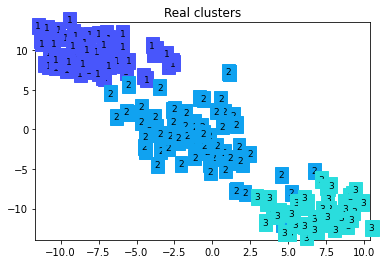

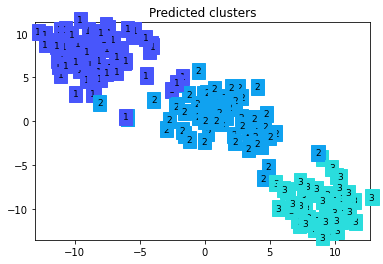

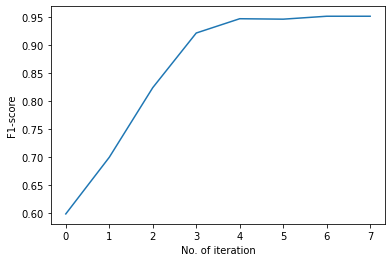

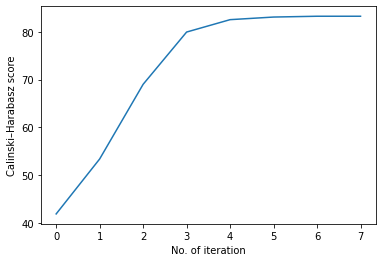

In [21]:
k_means(features.values, targets.values, 3, True)

In [22]:
CLUST = 10

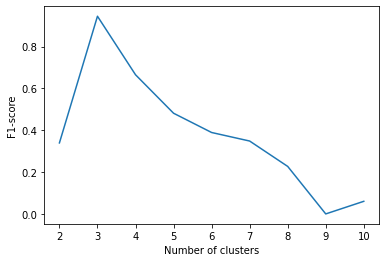

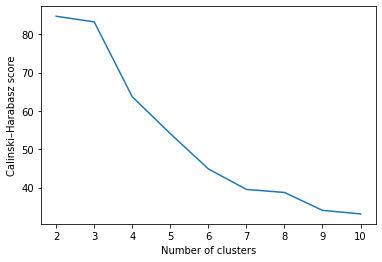

In [23]:
f1 = []
calh = []

for i in range(2, CLUST+1):
    f1_, calh_ = k_means(features.values, targets.values, i)
    f1.append(f1_)
    calh.append(calh_)
    
plot_accuracy(f1, True, True)
plot_accuracy(calh, False, True)